<a href="https://colab.research.google.com/github/rioseleng09/finalprojectanalysisdatadicoding/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: BIKE SHARING DATASET
- **Nama:** Rio Rezky Seleng
- **Email:** rioakunkhususbangkit@gmail.com
- **ID Dicoding:** rioseleng09

## Menentukan Pertanyaan Bisnis

- How does the bike sharing performance for each season?
- How does bike sharing performance compare on holiday and working day?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Based on the questions that I made, I will only use the day dataset to conduct the analysis process**

In [ ]:
#Creating day dataframes
day_df = pd.read_csv('https://raw.githubusercontent.com/rioseleng09/finalprojectanalysisdatadicoding/main/day.csv')

In [ ]:
#Preview day dataframe
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Assessing Data

In [ ]:
#View the statistics parameter of the data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#checking the null value
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

As we can see in the result, each column contain 731 records and there is no missing value


In [ ]:
#Checking the duplicated data
day_df.duplicated().sum()

0

Based on the previous code, there is no duplicated data in day dataframe

In [ ]:
#Checking the data types for each column
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


According to the previous information, **the dteday column should be stored in datetime datatype, but actually it is stored in object datatype**. Therefore, changing the data type should be conducted in the cleaning data step.The other columns already stored with the appropriate datatype

## Cleaning Data

In [ ]:
#Changing the 'dteday' column datatype to datetime

day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [ ]:
#Confirm the datatype already changed
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Showed above that the datatype of 'dteday' column already changed

## Exploratory Data Analysis (EDA)

### Answer for question number 1

In [ ]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
#Make a season_without_decode column the express the real season without decode with a number.
#The data obtained from 'season' column
#1 = Springer, 2=Summer, 3=fall, 4=winter
day_df["season_without_decode"] = day_df.season.apply(lambda x: "Springer" if x == 1 else ("Summer" if x == 2 else("fall" if x == 3 else "winter")))
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_without_decode
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Springer
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Springer
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Springer
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Springer
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Springer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Springer
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Springer
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Springer
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Springer


In [ ]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_without_decode
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Springer
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Springer
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Springer
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Springer
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Springer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Springer
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Springer
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Springer
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Springer


In [ ]:
_#Checking the dataype
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   instant                731 non-null    int64         
 1   dteday                 731 non-null    datetime64[ns]
 2   season                 731 non-null    int64         
 3   yr                     731 non-null    int64         
 4   mnth                   731 non-null    int64         
 5   holiday                731 non-null    int64         
 6   weekday                731 non-null    int64         
 7   workingday             731 non-null    int64         
 8   weathersit             731 non-null    int64         
 9   temp                   731 non-null    float64       
 10  atemp                  731 non-null    float64       
 11  hum                    731 non-null    float64       
 12  windspeed              731 non-null    float64       
 13  casua

In [ ]:
#Then, to answer the question number 1, The code could be:
day_df.groupby(by=["mnth", "season_without_decode"]).agg({
    "cnt":"sum"
})
#The code above is to group a season then count the amount of bike sharing

cnt
mnth season_without_decode        
1    Springer               134933
2    Springer               151352
3    Springer               142065
     Summer                  86855
4    Summer                 269094
5    Summer                 331686
6    Summer                 230954
     fall                   115388
7    fall                   344948
8    fall                   351194
9    fall                   249599
     winter                  96392
10   winter                 322352
11   winter                 254831
12   Springer                42998
     winter                 168038

### Answer question number 2

In [ ]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_without_decode
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Springer
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Springer
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Springer
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Springer
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Springer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Springer
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Springer
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Springer
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Springer


In [ ]:
#Make 'working_or_holiday_without_decode' column to express the real value of 'workingday' column
#The rule of conversion is
# 0=holiday and 1=working day
day_df["working_or_holiday_without_decode"] = day_df.workingday.apply(lambda x: "Working day" if x == 1 else "Holiday")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_without_decode,working_or_holiday_without_decode
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Springer,Holiday
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Springer,Holiday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Springer,Working day
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Springer,Working day
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Springer,Working day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Springer,Working day
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Springer,Working day
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Springer,Holiday
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Springer,Holiday


In [ ]:
#The code snippet to answer question number 2 asl follows
day_df.groupby(by = "working_or_holiday_without_decode").agg({
    "cnt" : "sum"
})

,cnt
working_or_holiday_without_decode,
Holiday,1000269
Working day,2292410


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
#Make a new data frame to answer question number 1
answer_for_question_1_df = day_df.groupby(by="season_without_decode").agg({
  "cnt":"sum"}).reset_index()

In [ ]:
#Rename the columns name
answer_for_question_1_df.rename(columns={
    "season_without_decode" : "season"
}, inplace = True)
#Check the datframe
answer_for_question_1_df

,season,cnt
0,Springer,471348
1,Summer,918589
2,fall,1061129
3,winter,841613


In [ ]:
answer_for_question_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  4 non-null      object
 1   cnt     4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


<ipython-input-34-958ab67dff55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, '')

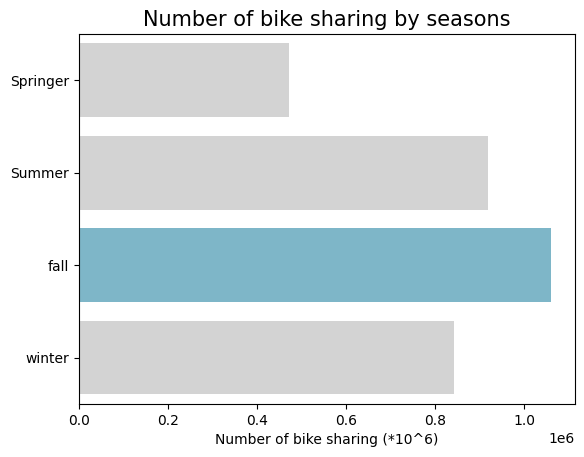

In [ ]:
colors = ["#D3D3D3", "#D3D3D3","#72BCD4", "#D3D3D3",]
sns.barplot(
    y='season',
    x='cnt',
    data=answer_for_question_1_df,
    palette=colors
)
plt.title("Number of bike sharing by seasons", loc="center", fontsize=15)
plt.xlabel("Number of bike sharing (*10^6)")
plt.ylabel(None)

From the code above, Fall season have the highest amount of bike sharing at 2011 and 2012

### Pertanyaan 2:

In [ ]:
answer_for_question_2_df = day_df.groupby(by = "working_or_holiday_without_decode").agg({
    "cnt" : "sum"
}).reset_index()

In [ ]:
answer_for_question_2_df.rename(columns={
    "working_or_holiday_without_decode" : "Day category"
}, inplace = True)

In [ ]:
answer_for_question_2_df

,Day category,cnt
0,Holiday,1000269
1,Working day,2292410


<ipython-input-38-eba731fb4c57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, '')

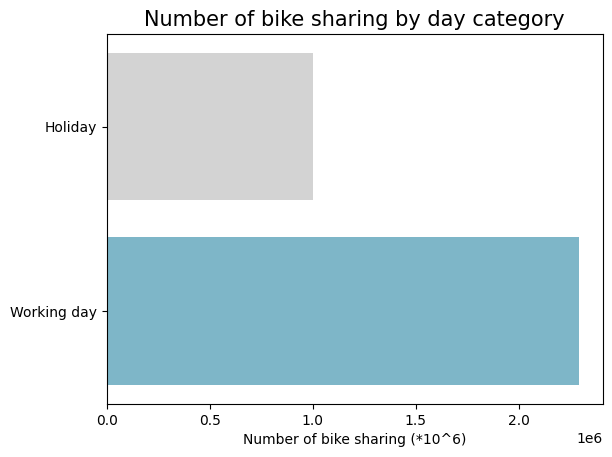

In [ ]:
colors = ["#D3D3D3", "#72BCD4"]
sns.barplot(
    y='Day category',
    x='cnt',
    data=answer_for_question_2_df,
    palette=colors
)
plt.title("Number of bike sharing by day category", loc="center", fontsize=15)
plt.xlabel("Number of bike sharing (*10^6)")
plt.ylabel(None)

## Conclusion

- Conclution pertanyaan 1:
The question number one already answered by take a look at the visualization that i have made. The answer for this question is that fall season has the highest amount of bike rental
- Conclution pertanyaan 2:
The question number two answered through the analysis that I have made. The highest amount of bike sharing being rented is at working day
- Based on both conclusion above, the bike-sharing company could optimizing resources and offerings during these peak periods to maximize their revenue.